# ¡Hola, Francisco!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

## Introduccion

Model Fitness, una cadena de gimnasios, ha identificado la necesidad de mejorar la retención de clientes a través de un análisis profundo de los datos disponibles. La rotación de clientes, o "churn," es un desafío común en este tipo de negocios, y comprender los factores que influyen en esta pérdida puede proporcionar valiosas oportunidades para optimizar las estrategias de retención. Este proyecto tiene como objetivo analizar los perfiles de los clientes, predecir la probabilidad de pérdida, identificar patrones clave y formular recomendaciones para mejorar la retención de clientes.

### Importar librerias

In [24]:
# Paso 1: Importar las librerías necesarias y cargar los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

### Carga del dataset

In [25]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

### Revisión inicial del dataset

In [26]:
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Limpiezade los datos

In [27]:
# Verificar valores nulos
print(df.isnull().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [28]:
# Valores medios de las características por grupo (cancelación o no)
grouped_means = df.groupby('Churn').mean()
print(grouped_means)


         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

### Visualización de histogramas y distribuciones:

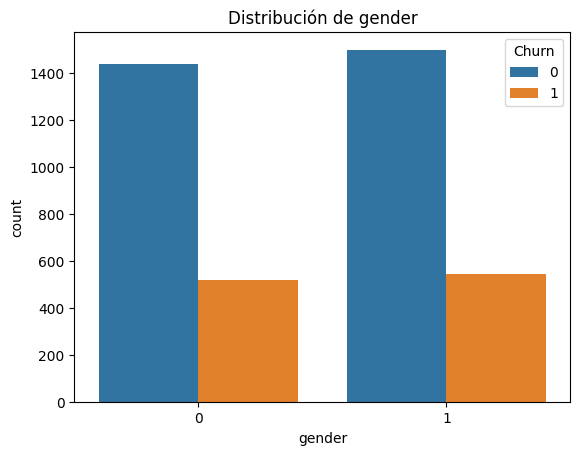

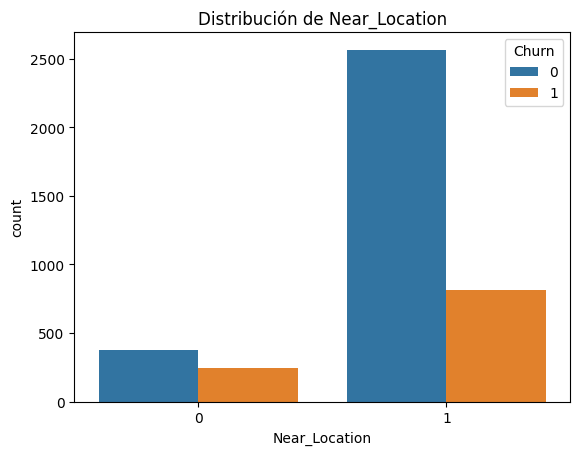

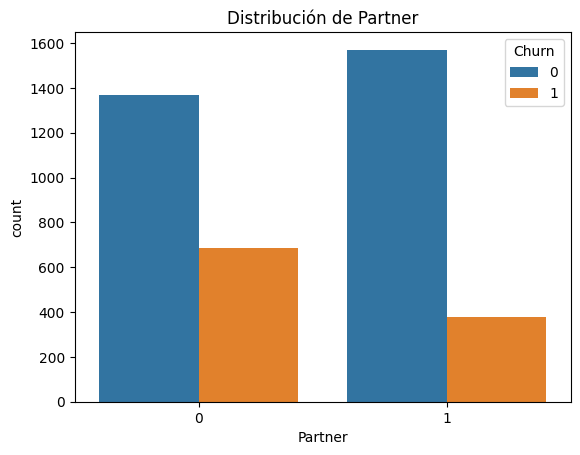

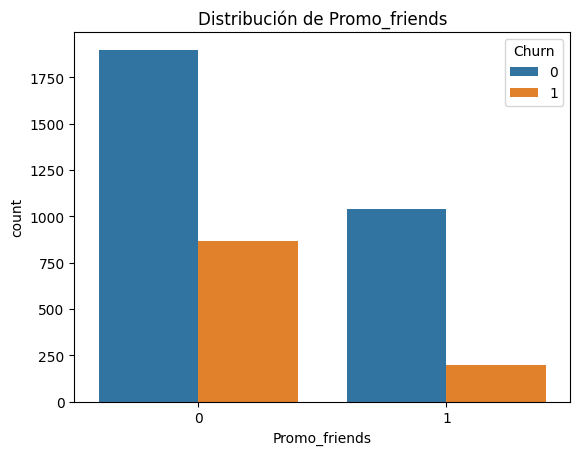

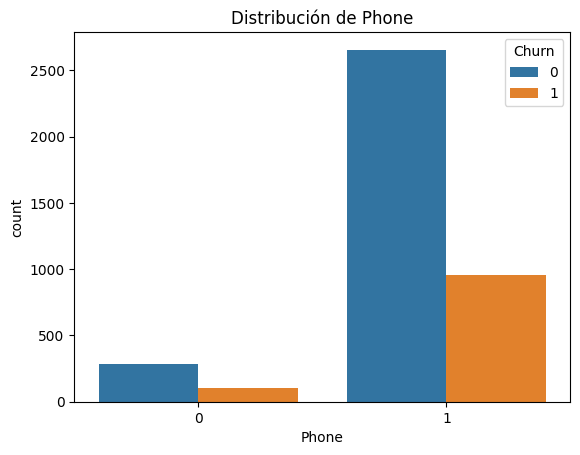

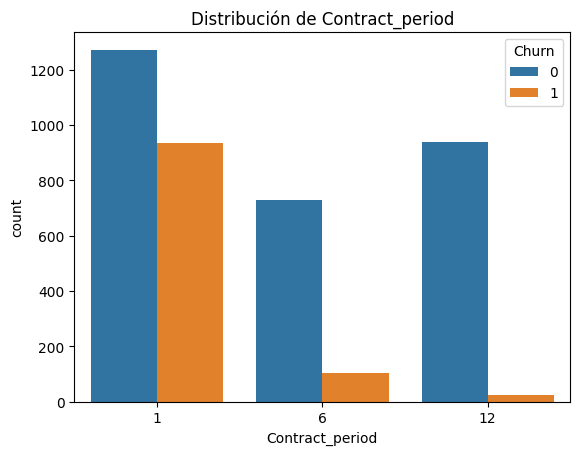

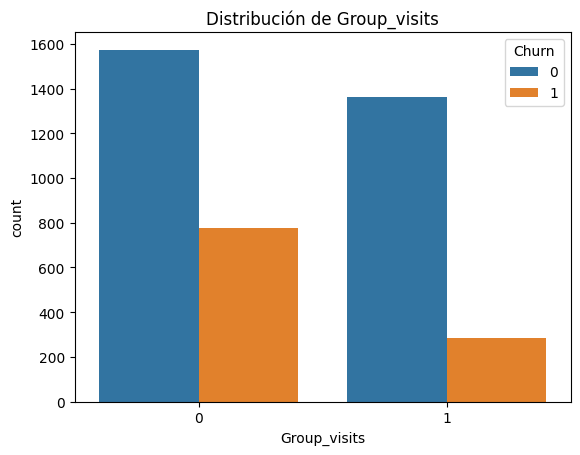

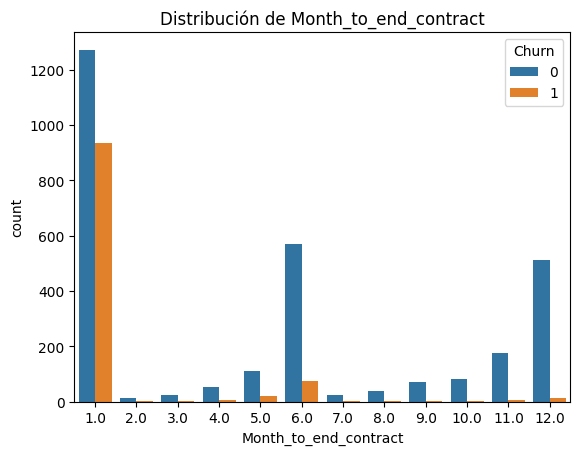

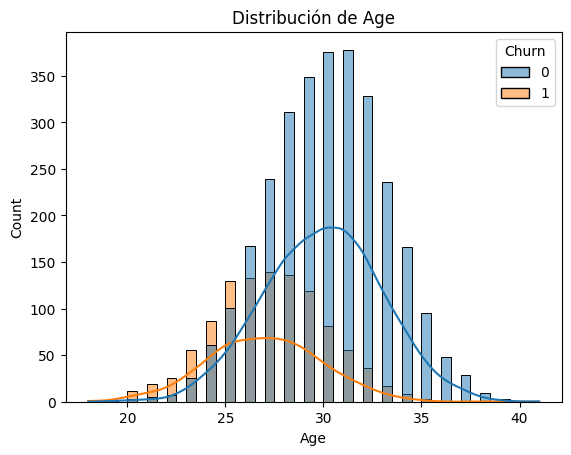

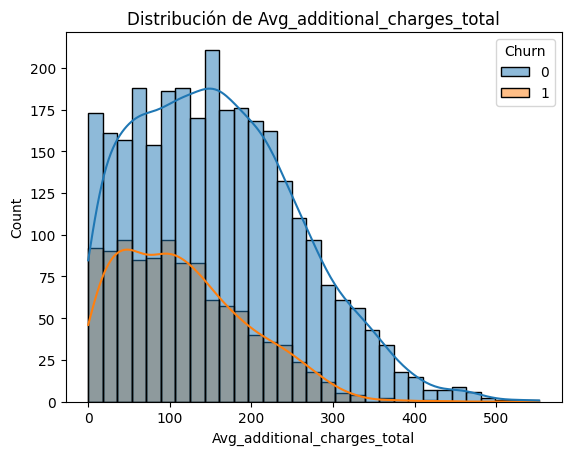

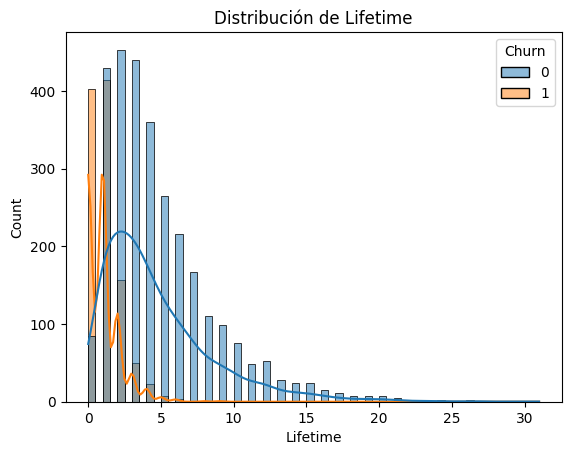

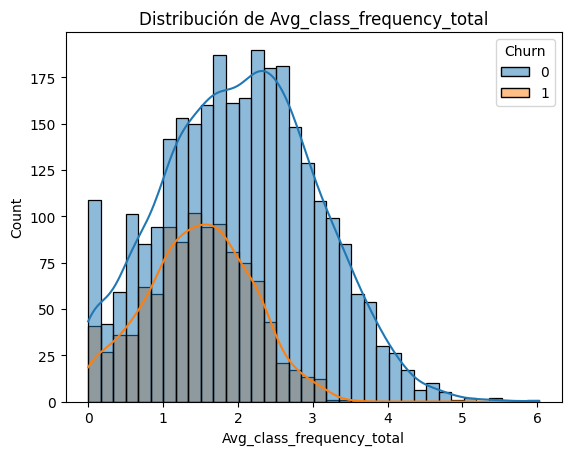

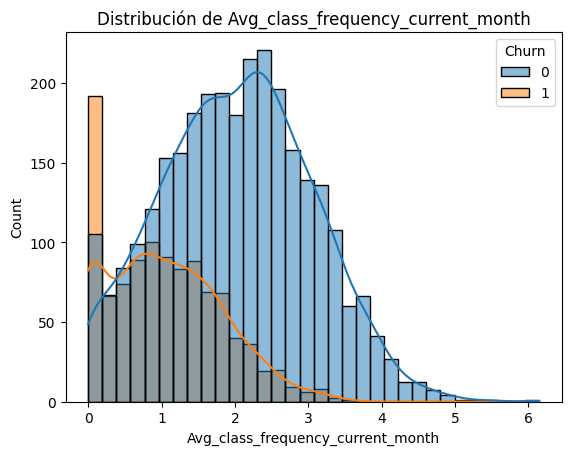

In [29]:
# Identificar variables discretas/binarias y continuas
discrete_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 
                    'Contract_period', 'Group_visits', 'Month_to_end_contract', 'Churn']

continuous_columns = ['Age', 'Avg_additional_charges_total', 
                      'Lifetime', 'Avg_class_frequency_total', 
                      'Avg_class_frequency_current_month']

# Gráficos de barras para variables discretas/binarias
for column in discrete_columns:
    if column != 'Churn':  
        plt.figure()
        sns.countplot(data=df, x=column, hue='Churn')
        plt.title(f'Distribución de {column}')
        plt.show()

# Histogramas y funciones de kernel para variables continuas
for column in continuous_columns:
    plt.figure()
    sns.histplot(data=df, x=column, hue='Churn', kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

Distribución de Variables Discretas/Binarias:

gender: La distribución es equilibrada entre ambos grupos, lo que sugiere que el género no es un factor significativo en la cancelación.

Near_Location: Los clientes que viven o trabajan cerca tienen menos probabilidades de cancelar, destacando la importancia de la proximidad.

Partner: Los clientes asociados con empresas tienen una menor tasa de cancelación, indicando que los beneficios asociados son efectivos.

Promo_friends: La promoción "trae a un amigo" está relacionada con una mayor retención, subrayando su efectividad.

Contract_period: Los contratos de mayor duración están vinculados a menores tasas de cancelación.

Distribución de Variables Continuas:

Age: Los clientes más jóvenes tienden a cancelar más.

Avg_additional_charges_total: Un mayor gasto en servicios adicionales se asocia con una menor tasa de cancelación.

Lifetime: Un mayor tiempo de vida en el gimnasio se correlaciona con una mayor retención.

Avg_class_frequency_total y Avg_class_frequency_current_month: Los clientes que asisten con mayor regularidad tienen menos probabilidades de cancelar.

### Matriz de correlación:

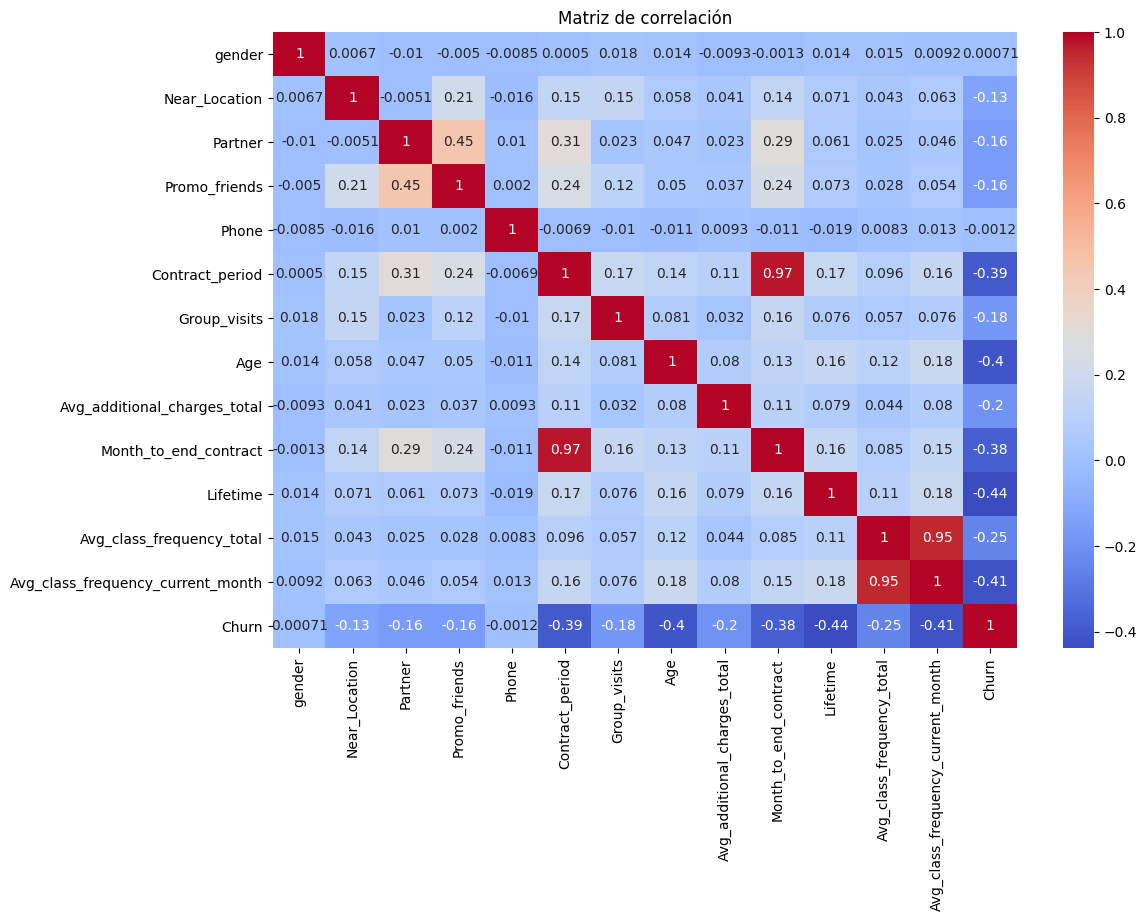

In [30]:
# Matriz de correlación y heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Matriz de Correlación:

Observación: La matriz de correlación mostró que las variables relacionadas con la frecuencia de visitas y la duración del contrato están fuertemente correlacionadas con la retención de clientes.
Importancia: Estas correlaciones refuerzan la idea de que mantener a los clientes comprometidos a través de visitas regulares y compromisos contractuales más largos puede reducir la rotación.

### División de los datos:

In [31]:
# Definir características y objetivo
X = df.drop(columns=['Churn'])
y = df['Churn']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar los tamaños de los conjuntos de entrenamiento y prueba
print(f'Tamaño del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Tamaño del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}')

Tamaño del conjunto de entrenamiento: X_train: (3200, 13), y_train: (3200,)
Tamaño del conjunto de prueba: X_test: (800, 13), y_test: (800,)


In [32]:
# Datos escalados
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# Regresión logística con un número mayor de iteraciones
lr_model = LogisticRegression(random_state=42, max_iter=1000)  # Incrementa max_iter
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)

# Bosque aleatorio (manteniendo el código anterior)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluación de modelos
def evaluate_model(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

print("Evaluación de Regresión Logística:")
evaluate_model(y_test, lr_predictions)

print("Evaluación de Bosque Aleatorio:")
evaluate_model(y_test, rf_predictions)

Evaluación de Regresión Logística:
Accuracy: 0.92, Precision: 0.87, Recall: 0.78
Evaluación de Bosque Aleatorio:
Accuracy: 0.91, Precision: 0.85, Recall: 0.78


### Estandarización:

In [33]:
# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Creación de dendrograma:

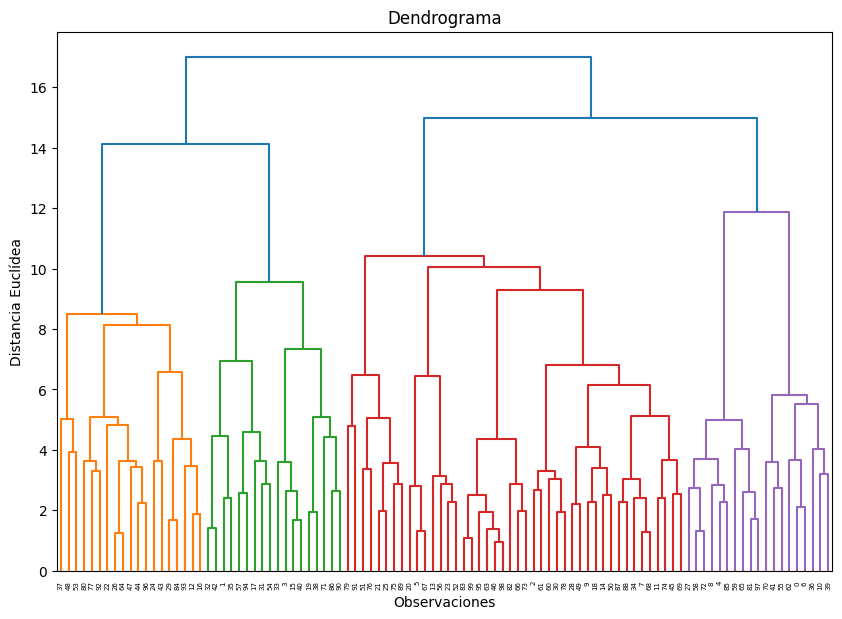

In [34]:
sample_X_scaled = X_scaled[:100]  
linked_sample = linkage(sample_X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked_sample)
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia Euclídea')
plt.show()

Dendrograma:

Observación: El dendrograma reveló la posibilidad de dividir a los clientes en 5 clústeres principales, lo que proporciona una estructura para analizar diferentes segmentos de clientes.
Importancia: Identificar estos clústeres permite una personalización más efectiva de las estrategias de marketing y retención, ajustando las tácticas a las necesidades y comportamientos específicos de cada grupo.

### Entrenamiento del modelo K-means y predicción de clústeres:

In [35]:
# Modelo K-means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Valores medios por clúster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                                  
0  

### Distribuciones de características y tasa de cancelación por clúster

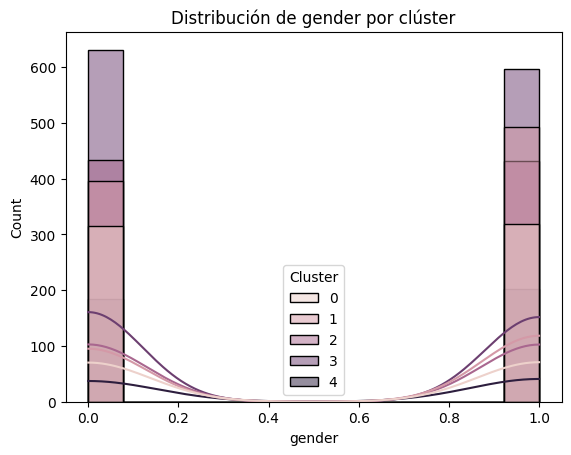

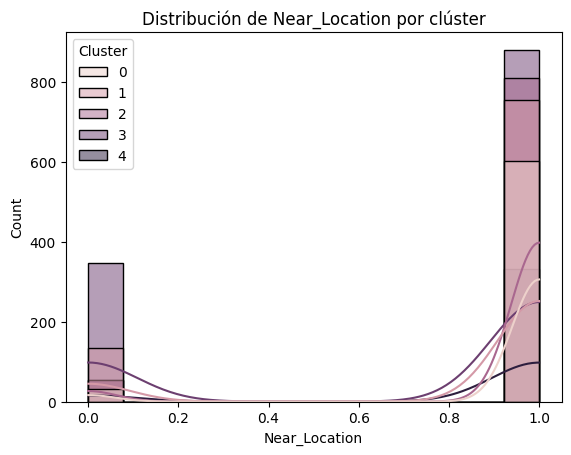

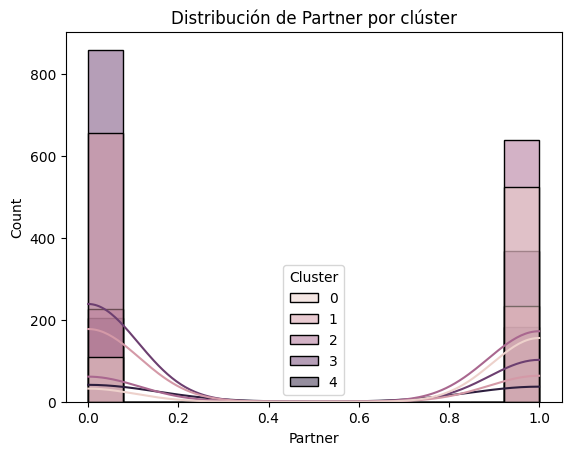

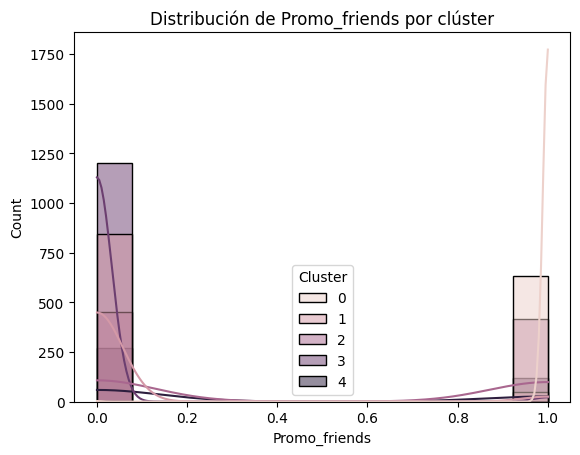

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


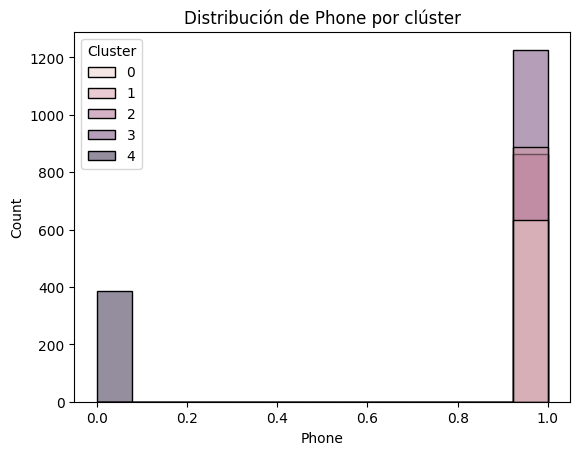

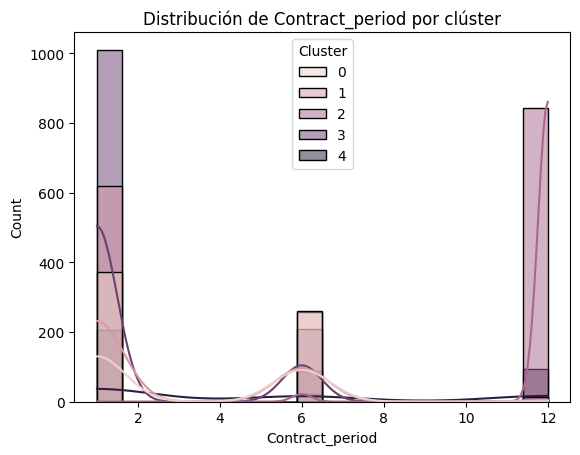

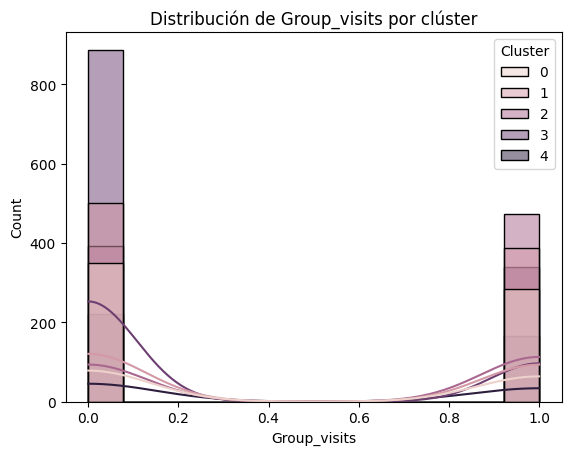

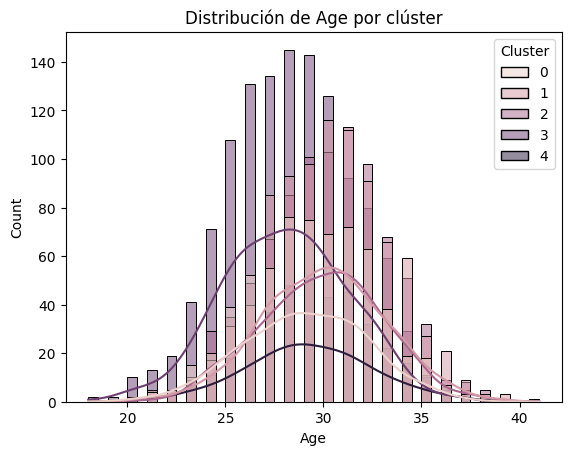

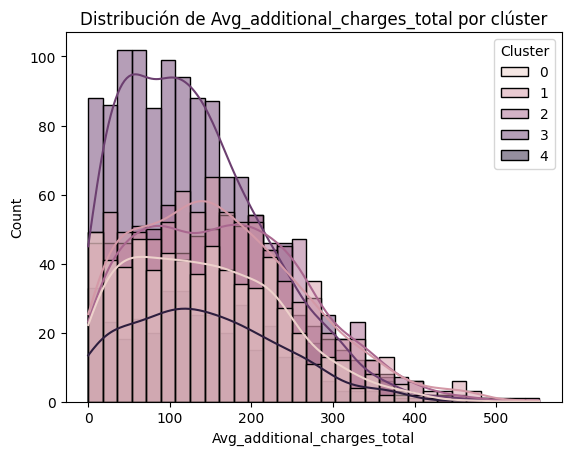

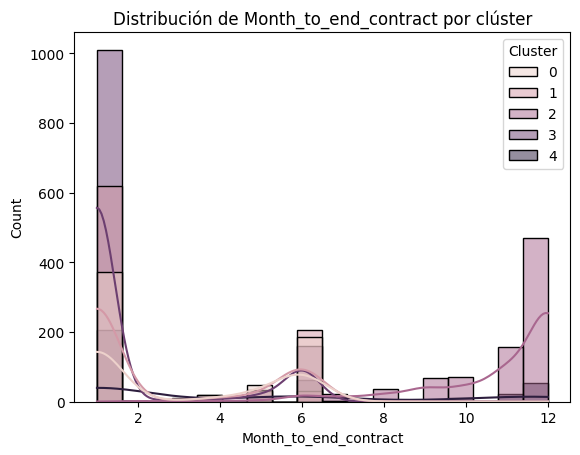

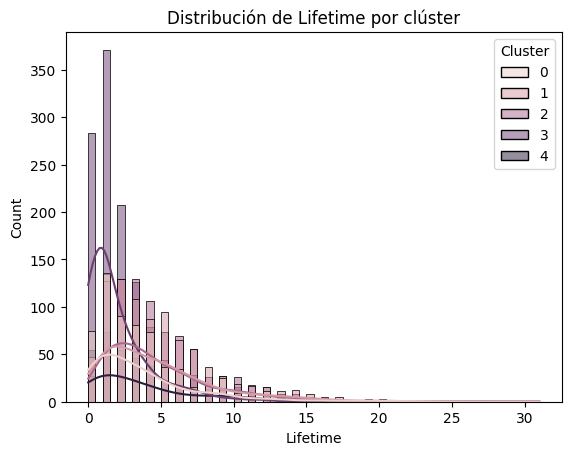

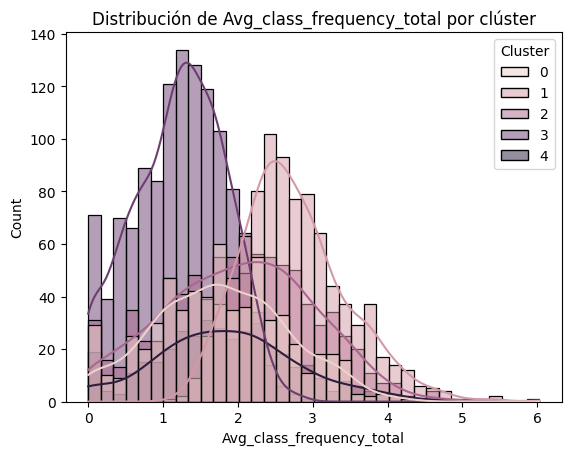

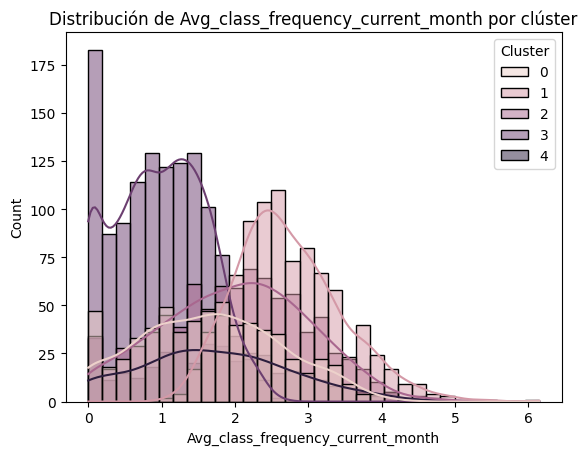

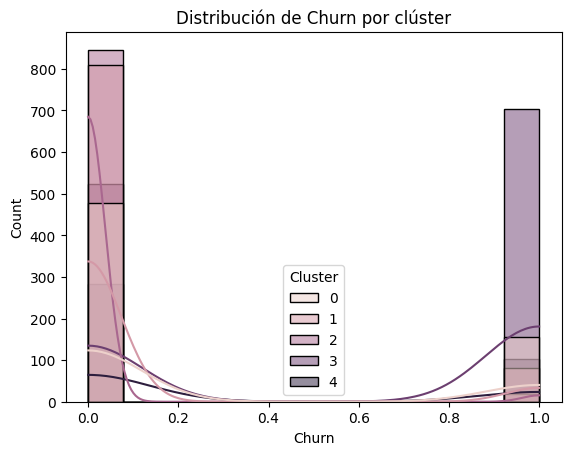

Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


In [36]:
# Distribuciones de características por clúster
for column in df.columns:
    if column != 'Cluster':  
        plt.figure()
        sns.histplot(data=df, x=column, hue='Cluster', kde=True)
        plt.title(f'Distribución de {column} por clúster')
        plt.show()

# Tasa de cancelación por clúster
cluster_churn_rate = df.groupby('Cluster')['Churn'].mean()
print(cluster_churn_rate)

Distribuciones de Características por Clúster:

Observación: Cada clúster muestra diferentes patrones de comportamiento y características. Por ejemplo, el clúster con la tasa de cancelación más baja incluye clientes con contratos más largos y una alta frecuencia de visitas.
Importancia: Esto sugiere que los clientes más leales están más comprometidos con su régimen de ejercicios y tienen un contrato de membresía más largo, lo que indica que incentivos hacia la extensión de contratos pueden ser una estrategia útil.

## Conclusión y Recomendaciones

En base a los análisis realizados, se pueden formular varias recomendaciones para mejorar la retención de clientes en Model Fitness:

Incentivar Contratos de Largo Plazo: Dado que los clientes con contratos más largos muestran una menor probabilidad de cancelación, es recomendable ofrecer incentivos para que los clientes adquieran o renueven contratos por periodos más extensos.

Promover Clases Grupales: La participación en clases grupales está asociada con una mayor retención. Se sugiere aumentar la oferta de clases grupales y fomentar la participación a través de promociones y eventos especiales.

Monitoreo y Seguimiento Proactivo: Identificar a los clientes que muestran signos tempranos de pérdida, como una disminución en la frecuencia de visitas, y realizar un seguimiento proactivo puede prevenir la cancelación. Programas de fidelización y ofertas personalizadas podrían ser útiles en estos casos.

Segmentación de Clientes: Utilizar el análisis de clústeres para segmentar a los clientes permite personalizar las estrategias de marketing y retención según las características y comportamientos de cada grupo. Esto asegurará que las tácticas sean más efectivas y adecuadas para cada segmento de clientes.

Implementando estas estrategias, Model Fitness puede mejorar la retención de clientes, reducir la tasa de cancelación y, en última instancia, aumentar la satisfacción y lealtad de su base de clientes.

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>